In [ ]:
import numpy as np
from bertopic import BERTopic
from transformers.pipelines import pipeline
from sentence_transformers import SentenceTransformer
from umap import UMAP
from hdbscan import HDBSCAN
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
pip install bertopic

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [ ]:
import torch
from torch.utils.data import DataLoader
from transformers import BertTokenizer, BertModel
from tqdm import tqdm
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction import text

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

df_golden_15features = pd.read_csv('/content/drive/My Drive/Dissertation/df_golden_15features.csv')

In [ ]:
with open('/content/drive/My Drive/Dissertation/golden_observations_tokenized.txt', 'w') as file:
    for word_list in df_golden_15features['Tokenized without stop words']:
        # 将单词列表转换为以空格分隔的字符串
        line = ' '.join(word_list)
        # 写入文件，并换行
        file.write(line + '\n')

In [ ]:

file_name = '/content/drive/My Drive/Dissertation/golden_observations_tokenized.txt'
with open(file_name, 'r') as file:
  docs = file.readlines()
print('number of rows: ', len(docs))
print('preview: ', docs[0])

vectorizer_model = None

number of rows:  300
preview:  whilst answering natures apparent toilet bloked causing hygiene issue



In [ ]:
model_name = "bert-base-uncased"
model = BertModel.from_pretrained(model_name)
tokenizer = BertTokenizer.from_pretrained(model_name)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

model.eval()

# 切分数据
batch_size = 16  # 批大小
data_loader = DataLoader(docs, batch_size=batch_size)
for batch in data_loader:
    print(len(batch), batch)



cls_embeddings = []

for batch_sentences in tqdm(data_loader):

    inputs = tokenizer(batch_sentences, padding=True, truncation=True, return_tensors="pt", max_length=512)

    inputs.to(device)

    with torch.no_grad():
        outputs = model(**inputs)


    cls_embeddings.append(outputs.last_hidden_state[:, 0].cpu().numpy()) # 只取CLS对应的向量
    print('numpy格式', type(outputs.last_hidden_state[:, 0].cpu().numpy()), outputs.last_hidden_state[:, 0].cpu().numpy().shape)

print('batch个数：', len(cls_embeddings))
cls_embeddings_np = np.vstack(cls_embeddings)
print('最终生成的词向量', type(cls_embeddings_np), cls_embeddings_np.shape)


output_file = "/content/drive/My Drive/Dissertation/emb.npy"
np.save(output_file, cls_embeddings_np)
print("词向量存储于: ", output_file)

embeddings = np.load(output_file)
print("加载回来，验证一下：", type(embeddings), embeddings.shape)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

16 ['whilst answering natures apparent toilet bloked causing hygiene issue\n', 'preparation works change supply accommodation services switch board noted tr ahu need configured recirc mode loss extract fan supplies conversation took place regarding effects covid 19 procedures recycling air accommodation job stopped investigation completed\n', 'use barriers restrict access area radiography carried\n', 'team member decanting oil mud pumps person wearing correct ppe oil resistant gloves correct paperwork including coshh assessment available area barriered spill kit available completion site cleaned left order\n', 'party conducting hot blankets extinguishers place gas test completed prior commencing start check watch aware requirement remain location 30 mins completion task\n', 'returning tr pick set boot covers picking realised wet looking saw used ones odour urine sensed clean cover shoes wash hands\n', 'op conducting biocide dosing operations task discussed op displayed sound understand

  5%|▌         | 1/19 [00:06<01:53,  6.32s/it]

numpy格式 <class 'numpy.ndarray'> (16, 768)


 11%|█         | 2/19 [00:08<01:07,  3.97s/it]

numpy格式 <class 'numpy.ndarray'> (16, 768)


 16%|█▌        | 3/19 [00:12<00:59,  3.73s/it]

numpy格式 <class 'numpy.ndarray'> (16, 768)


 21%|██        | 4/19 [00:16<01:02,  4.18s/it]

numpy格式 <class 'numpy.ndarray'> (16, 768)


 26%|██▋       | 5/19 [00:24<01:16,  5.44s/it]

numpy格式 <class 'numpy.ndarray'> (16, 768)


 32%|███▏      | 6/19 [00:28<01:05,  5.04s/it]

numpy格式 <class 'numpy.ndarray'> (16, 768)


 37%|███▋      | 7/19 [00:34<01:01,  5.14s/it]

numpy格式 <class 'numpy.ndarray'> (16, 768)


 42%|████▏     | 8/19 [00:37<00:49,  4.48s/it]

numpy格式 <class 'numpy.ndarray'> (16, 768)


 47%|████▋     | 9/19 [00:41<00:43,  4.39s/it]

numpy格式 <class 'numpy.ndarray'> (16, 768)


 53%|█████▎    | 10/19 [00:44<00:35,  3.89s/it]

numpy格式 <class 'numpy.ndarray'> (16, 768)


 58%|█████▊    | 11/19 [00:49<00:35,  4.39s/it]

numpy格式 <class 'numpy.ndarray'> (16, 768)


 63%|██████▎   | 12/19 [00:52<00:27,  3.91s/it]

numpy格式 <class 'numpy.ndarray'> (16, 768)


 68%|██████▊   | 13/19 [00:54<00:19,  3.33s/it]

numpy格式 <class 'numpy.ndarray'> (16, 768)


 74%|███████▎  | 14/19 [00:58<00:17,  3.47s/it]

numpy格式 <class 'numpy.ndarray'> (16, 768)


 79%|███████▉  | 15/19 [01:05<00:18,  4.57s/it]

numpy格式 <class 'numpy.ndarray'> (16, 768)


 84%|████████▍ | 16/19 [01:09<00:13,  4.37s/it]

numpy格式 <class 'numpy.ndarray'> (16, 768)


 89%|████████▉ | 17/19 [01:14<00:08,  4.48s/it]

numpy格式 <class 'numpy.ndarray'> (16, 768)


 95%|█████████▍| 18/19 [01:22<00:05,  5.71s/it]

numpy格式 <class 'numpy.ndarray'> (16, 768)


100%|██████████| 19/19 [01:25<00:00,  4.48s/it]

numpy格式 <class 'numpy.ndarray'> (12, 768)
batch个数： 19
最终生成的词向量 <class 'numpy.ndarray'> (300, 768)


词向量存储于:  /content/drive/My Drive/Dissertation/emb.npy
加载回来，验证一下： <class 'numpy.ndarray'> (300, 768)


In [ ]:
#创建模型
# 1. 词向量模型，同时加载本地训练好的词向量
embedding_model = pipeline("feature-extraction", model="bert-base-uncased") # 使用bert-base-chinese
embeddings = np.load('/content/drive/My Drive/Dissertation/emb.npy') # 使用bert-base-chinese向量
print('embeddings shape：', embeddings.shape)

# 2. 创建UMAP降维模型
umap_model = UMAP(
  n_neighbors=15,
  n_components=5,
  min_dist=0.0,
  metric='cosine',
  random_state=30  # ⚠️ 防止随机 https://maartengr.github.io/BERTopic/faq.html
)

# 3. 创建HDBSCAN聚类模型


hdbscan_model = HDBSCAN(
  min_cluster_size=5,
  min_samples=2,
  metric='euclidean'
)

# 5. 创建CountVectorizer模型
stop_words = text.ENGLISH_STOP_WORDS
# vectorizer_model = CountVectorizer(stop_words=ENGLISH_STOP_WORDS)
vectorizer_model = CountVectorizer(stop_words=list(stop_words))
# 6. 正式创建BERTopic模型
topic_model = BERTopic(
  embedding_model=embedding_model,
  vectorizer_model=vectorizer_model,
  umap_model=umap_model,
  hdbscan_model=hdbscan_model,
)


Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


embeddings shape： (300, 768)


In [ ]:
#训练模型
# 查看主题
topics, probs = topic_model.fit_transform(docs, embeddings=embeddings) #传入训练好的词向量
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,52,-1_op_used_carrying_equipment,"[op, used, carrying, equipment, job, personnel...",[routine walkaround noticed interlock master k...
1,0,37,0_crane_forklift_use_barriers,"[crane, forklift, use, barriers, op, tank, cor...",[men installing hose poorboy degasser producti...
2,1,34,1_noticed_looked_walking_whilst,"[noticed, looked, walking, whilst, visit, like...",[heard strange metallic noise scoping main dec...
3,2,18,2_completed_wcc_team_watch,"[completed, wcc, team, watch, prior, place, ga...",[took tbt hot naked flame wcc grinding door fr...
4,3,18,3_whilst_noticed_antenna_tyre,"[whilst, noticed, antenna, tyre, pull, helidec...",[whilst checking current lifting colour code p...
5,4,17,4_whilst_tank_cable_radiation,"[whilst, tank, cable, radiation, osv, noticed,...",[whilst pumping water deck starboard turret wb...
6,5,14,5_removed_access_pdo_rope,"[removed, access, pdo, rope, pin, hose, connec...",[forward walkway adjacent foam monitor d notic...
7,6,14,6_paperwork_rescue_team_equipment,"[paperwork, rescue, team, equipment, closers, ...",[spoke 2 electrical techs fitting new lights l...
8,7,12,7_isolation_software_report_mechanical,"[isolation, software, report, mechanical, moun...",[egc b outage preparations rep discussed plann...
9,8,11,8_scope_plan_discussion_discussed,"[scope, plan, discussion, discussed, held, mar...",[alerted smoke smell main deck flare ko drum a...


In [ ]:
document_info = topic_model.get_document_info(docs)
document_info


,Document,Topic,Name,Representation,Representative_Docs,Top_n_words,Probability,Representative_document
0,whilst answering natures apparent toilet bloke...,1,1_noticed_looked_walking_whilst,"[noticed, looked, walking, whilst, visit, like...",[heard strange metallic noise scoping main dec...,noticed - looked - walking - whilst - visit - ...,1.000000,False
1,preparation works change supply accommodation ...,-1,-1_op_used_carrying_equipment,"[op, used, carrying, equipment, job, personnel...",[routine walkaround noticed interlock master k...,op - used - carrying - equipment - job - perso...,0.000000,False
2,use barriers restrict access area radiography ...,-1,-1_op_used_carrying_equipment,"[op, used, carrying, equipment, job, personnel...",[routine walkaround noticed interlock master k...,op - used - carrying - equipment - job - perso...,0.000000,False
3,team member decanting oil mud pumps person wea...,2,2_completed_wcc_team_watch,"[completed, wcc, team, watch, prior, place, ga...",[took tbt hot naked flame wcc grinding door fr...,completed - wcc - team - watch - prior - place...,0.895814,False
4,party conducting hot blankets extinguishers pl...,2,2_completed_wcc_team_watch,"[completed, wcc, team, watch, prior, place, ga...",[took tbt hot naked flame wcc grinding door fr...,completed - wcc - team - watch - prior - place...,1.000000,False
...,...,...,...,...,...,...,...,...
295,deck foreman requested tannoy warn personnel h...,12,12_habitat_small_rescue_deck,"[habitat, small, rescue, deck, hatch, hand, vi...",[starting stage coating removal buoyancy tank ...,habitat - small - rescue - deck - hatch - hand...,0.723125,False
296,starboard laydown area noticed metal waste woo...,5,5_removed_access_pdo_rope,"[removed, access, pdo, rope, pin, hose, connec...",[forward walkway adjacent foam monitor d notic...,removed - access - pdo - rope - pin - hose - c...,1.000000,False
297,passing materials roof deck suspended scaffold...,-1,-1_op_used_carrying_equipment,"[op, used, carrying, equipment, job, personnel...",[routine walkaround noticed interlock master k...,op - used - carrying - equipment - job - perso...,0.000000,False
298,men rigfloortripping drillpipe communication p...,3,3_whilst_noticed_antenna_tyre,"[whilst, noticed, antenna, tyre, pull, helidec...",[whilst checking current lifting colour code p...,whilst - noticed - antenna - tyre - pull - hel...,0.574851,False


In [ ]:
def get_sentences_for_topic(topic_number):
    return document_info[document_info["Topic"] == topic_number]["Document"].values

print(get_sentences_for_topic(0))

['waste segregation slipping waste going wrong segregation bins accomodation\n'
 'op process cutting deck penetration using cengar type saw correct ppe controls place task op able explain steps included installing hard barrier final cuts completion cutting worksite swept tidy allow scaffolders begin install barriers\n'
 'carrying prework site checks wpp crane extinguisher outside crane cabin lying platform kick plate extinguisher wrong place secured moved safe location inside crane stored upright checked damage fit use\n'
 'pre cse inspection rigging tank equipment noted self inflating life jackets area added rescue plan used tank scope stop individual required accident wearing tanks potentially limit stop escape entrance worn rest tank entry ppe respects make harder rescue required surely tank scope normal lowering tank pumping equipment stages normal means pumping levels time mitigate need working areas using\n'
 'use flt load cargo container forklift driven safe manner barriers erec

In [ ]:
import pandas as pd
file_path_golden = '/content/drive/My Drive/Dissertation/golden_score1.csv'
df_golden = pd.read_csv(file_path_golden)

topics = document_info[['Topic']]

# 将 Topic 列拼接到 df_golden 后面
df_combined = pd.concat([df_golden, topics.reset_index(drop=True)], axis=1)


In [ ]:
df_combined
df_combined_sorted = df_combined.sort_values(by='overall_score', ascending=False)
df_combined_sorted
# df_combined_sorted.to_csv('/content/drive/My Drive/Dissertation/combined_sorted.csv', index=False)
df_combined

,id,observation text,safe/unsafe,safe/unsafe_x,safe/unsafe_y,act/condition,act/condition_x,act/condition_y,name,comments from annotator,...,barrier_labels_y,safetype_score,barriertype_score,comments_score,hazard_labels_score,lsr_labels_score,barrier_labels_score,overall_score,quality_type,Topic
0,OC-00004734,"Whilst answering natures call, it became appar...",['Unsafe'],['Unsafe'],['Unsafe'],['Condition'],['Condition'],['Condition'],"['Al', 'Ma']","[""Depending on the circumstances, this is not ...",...,['Inspections'],1,1,1,1.00,0.00,0.5,0.3250,low quality,1
1,OC-00005008,During preparation works to change the supply ...,"['Unsafe', 'Safe']",['Unsafe'],['Safe'],"['Act', 'Condition']",['Act'],['Condition'],"['Al', 'Gu']",[],...,"['Following Procedures', 'Protection Systems']",0,0,0,1.00,0.75,0.5,0.3375,low quality,-1
2,OC-00005735,Good use of barriers to restrict access into w...,['Safe'],['Safe'],['Safe'],['Act'],['Act'],['Act'],"['Ro', 'An']",['Work control - restricted access'],...,"['Inspections', 'Following Procedures']",1,1,1,0.50,0.50,0.5,0.3250,low quality,-1
3,OC-00006026,Observed team member de-canting oil from Mud p...,['Safe'],['Safe'],['Safe'],['Act'],['Act'],['Act'],"['Da', 'Ma']",[],...,"['Following Procedures', 'Process Containment']",1,1,0,1.00,1.00,1.0,1.0000,high quality,2
4,OC-00006164,Observed work party conducting hot work. Fire ...,['Safe'],['Safe'],['Safe'],['Act'],['Act'],['Act'],"['Ro', 'Gu']",[],...,"['Authorising Equipment', 'Emergency Response'...",1,1,0,0.50,0.50,0.5,0.7750,high quality,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,OC-00049382,Deck Foreman requested tannoy to be put out to...,[],[],[],[],[],[],"['Ro', 'Gu']",[],...,[],0,0,0,0.00,0.00,0.0,0.0000,low quality,12
296,OC-00049406,"At the starboard laydown area, I noticed that ...",['Unsafe'],['Unsafe'],['Unsafe'],['Act'],['Act'],['Act'],"['Al', 'Gu']",[],...,[],1,1,0,0.50,0.00,0.5,0.7000,high quality,5
297,OC-00049517,Passing materials from roof deck to suspended ...,['Unsafe'],['Unsafe'],['Unsafe'],['Condition'],['Condition'],['Condition'],"['Al', 'Gu']",[],...,[],1,1,0,0.50,0.50,0.5,0.7750,high quality,-1
298,OC-00049542,"Observed men on rigfloortripping drillpipe, go...",['Safe'],['Safe'],['Safe'],['Act'],['Act'],['Act'],"['Al', 'Ma']",[],...,"['Inspections', 'Following Procedures']",1,1,0,0.75,1.00,1.0,0.9625,high quality,3


In [ ]:
import pandas as pd
df_combined_sorted = pd.read_csv('/content/drive/My Drive/Dissertation/combined_sorted.csv')


In [ ]:
df_combined_sorted

,id,observation text,safe/unsafe,safe/unsafe_x,safe/unsafe_y,act/condition,act/condition_x,act/condition_y,name,comments from annotator,...,barrier_labels_y,safetype_score,barriertype_score,comments_score,hazard_labels_score,lsr_labels_score,barrier_labels_score,overall_score,quality_type,Topic
3,OC-00006026,Observed team member de-canting oil from Mud p...,['Safe'],['Safe'],['Safe'],['Act'],['Act'],['Act'],"['Da', 'Ma']",[],...,"['Following Procedures', 'Process Containment']",1,1,0,1.0,1.0,1.0,1.00,high quality,1
15,OC-00010189,Air horn for confined space entry has very li...,['Unsafe'],['Unsafe'],['Unsafe'],['Condition'],['Condition'],['Condition'],"['Da', 'Ma']",[],...,"['Inspections', 'Following Procedures', 'Emerg...",1,1,0,1.0,1.0,1.0,1.00,high quality,2
290,OC-00048202,On the BLP main deck there were a number of w...,['Unsafe'],['Unsafe'],['Unsafe'],['Condition'],['Condition'],['Condition'],"['Da', 'An']",[],...,"['Inspections', 'Following Procedures']",1,1,0,1.0,1.0,1.0,1.00,high quality,8
282,OC-00047326,OPs observed carrying out TBT prior to commenc...,['Safe'],['Safe'],['Safe'],['Act'],['Act'],['Act'],"['Da', 'An']",[],...,"['Inspections', 'Following Procedures']",1,1,0,1.0,1.0,1.0,1.00,high quality,1
275,OC-00046617,During the Opitto OEFRTM course at Newcastle A...,['Unsafe'],['Unsafe'],['Unsafe'],['Act'],['Act'],['Act'],"['Al', 'Ma']",[],...,"['Emergency Response', 'Following Procedures',...",1,1,0,1.0,1.0,1.0,1.00,high quality,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,OC-00028151,Op was carrying out Electrical maintenance on ...,[],[],[],[],[],[],"['Ro', 'An']",['Not enough information'],...,[],0,0,1,0.0,0.0,0.0,-0.45,low quality,-1
137,OC-00032182,Whilst attending a toolbox talk for the crane ...,[],[],[],[],[],[],"['Ro', 'Gu']",['Observation text does not contain any meanin...,...,[],0,0,1,0.0,0.0,0.0,-0.45,low quality,-1
26,OC-00021946,Observed NS crew had sourced a bund for storin...,[],[],[],[],[],[],"['Ro', 'An']",['Not enough informationto classify'],...,[],0,0,1,0.0,0.0,0.0,-0.45,low quality,4
160,OC-00034580,Observed persons carrying out shutdown work-sc...,[],[],[],[],[],[],"['Al', 'Gu']","['Insuffient information', ""I haven't classifi...",...,[],0,0,1,0.0,0.0,0.0,-0.45,low quality,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_combined_sorted['quality_type_encoded'] = label_encoder.fit_transform(df_combined_sorted['quality_type'])

contingency_table_qualitytype = pd.crosstab(df_combined_sorted['Topic'], df_combined_sorted['quality_type_encoded'])
contingency_table_overallscore = pd.crosstab(df_combined_sorted['Topic'], df_combined_sorted['overall_score'])
contingency_table_commentscore = pd.crosstab(df_combined_sorted['Topic'], df_combined_sorted['comments_score'])
contingency_table_commentscore = pd.crosstab(df_combined_sorted['Topic'], df_combined_sorted['comments_score'])
contingency_table_lsr_labels_score = pd.crosstab(df_combined_sorted['Topic'], df_combined_sorted['lsr_labels_score'])
print(contingency_table_overallscore)

overall_score  -4.500000e-01  -1.500000e-01  -7.500000e-02  -3.750000e-02  \
Topic                                                                       
-1                         3              0              0              0   
 0                         0              0              0              0   
 1                         2              0              1              0   
 2                         0              0              0              0   
 3                         1              0              0              0   
 4                         0              0              1              0   
 5                         0              0              1              0   
 6                         0              0              0              0   
 7                         0              0              0              0   
 8                         0              0              0              0   
 9                         1              1              0              0   

In [ ]:
from scipy.stats import chi2_contingency

# 计算卡方统计量
chi2, p, dof, expected = chi2_contingency(contingency_table_qualitytype)
print(f'Chi-Square Statistic: {chi2}')
print(f'P-value: {p}')

Chi-Square Statistic: 31.77054892902604
P-value: 0.0004372522581620883


In [ ]:
import numpy as np

# 计算 Cramer's V
def cramers_v(chi2, n, k1, k2):
    return np.sqrt(chi2 / (n * min(k1 - 1, k2 - 1)))

n = contingency_table_qualitytype.sum().sum()  # 总样本量
k1, k2 = contingency_table_qualitytype.shape  # 变量的类别数

cramers_v_value = cramers_v(chi2, n, k1, k2)
print(f"Cramer's V: {cramers_v_value}")

Cramer's V: 0.23011065790551744


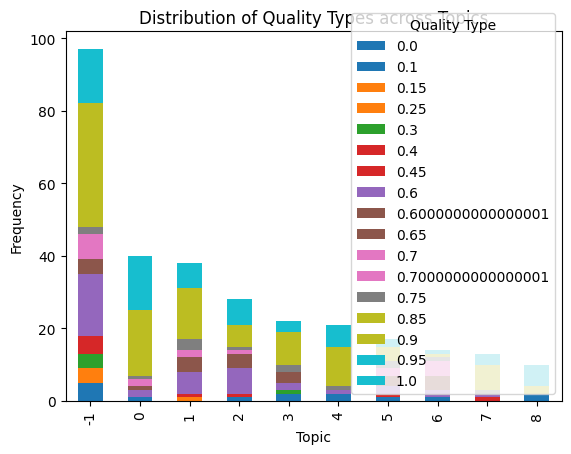

In [ ]:
import matplotlib.pyplot as plt

# 绘制堆叠条形图
contingency_table_overallscore.plot(kind='bar', stacked=True, colormap='tab10')
plt.xlabel('Topic')
plt.ylabel('Frequency')
plt.title('Distribution of Quality Types across Topics')
plt.legend(title='Quality Type')
plt.show()

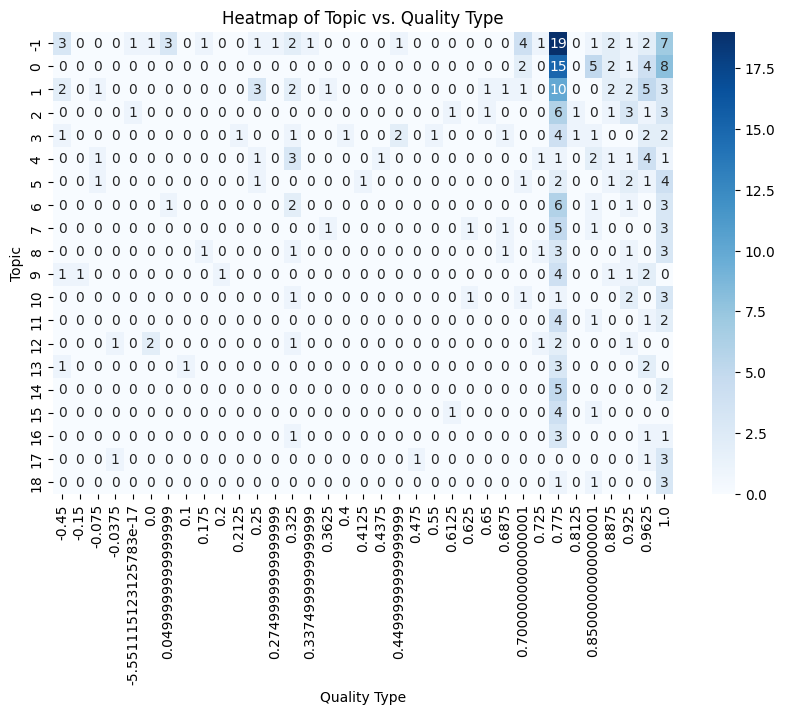

In [ ]:
import seaborn as sns

# 绘制热图
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table_overallscore, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Quality Type')
plt.ylabel('Topic')
plt.title('Heatmap of Topic vs. Quality Type')
plt.show()

